# Iniciando analise de dados da tabela insurance

objetivo de criar um modelo que encontre o motivo do plano de saúde ser mais caro com base nesses dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("insurance.csv")

## Para melhor analise dos dados vamos transformar os tipos de categoria de texto para numérico

In [3]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

dataset['smoker'] =  label_encoder.fit_transform(dataset['smoker'])
dataset['sex'] =  label_encoder.fit_transform(dataset['sex'])

region_encoded = one_hot_encoder.fit_transform(dataset[['region']]).toarray()
region_encoded_df = pd.DataFrame(region_encoded, columns=one_hot_encoder.get_feature_names_out(['region']))

dataset = pd.concat([dataset, region_encoded_df], axis=1)
dataset.drop('region', axis=1, inplace=True)

# Analisando dados exploratórios

## Verificando dados do dataset

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


## Analisando as descrições estatiticas do dataset, para encontrar alguma tendência

In [5]:
dataset.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## Novo dataset agora com os dados transformados

In [6]:
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


## Como está a distribuição de idade do dataset?

<Axes: >

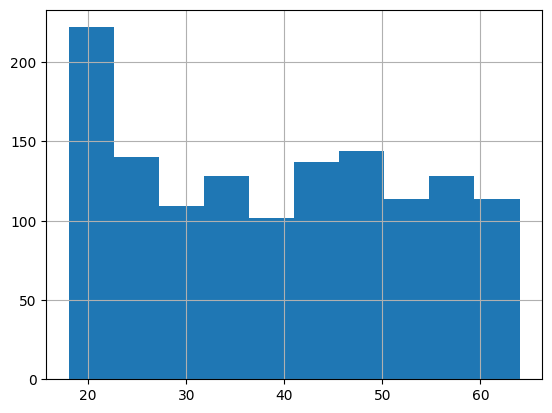

In [7]:
dataset['age'].hist()

## Como está a distribuição de Charges do dataset?

<Axes: >

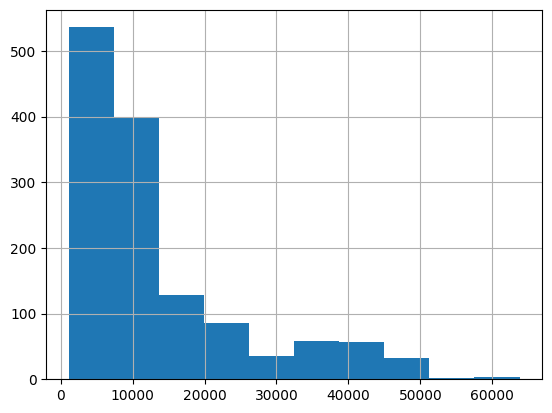

In [8]:
dataset['charges'].hist()

## Como está a distribuição de BMI do dataset?

<Axes: >

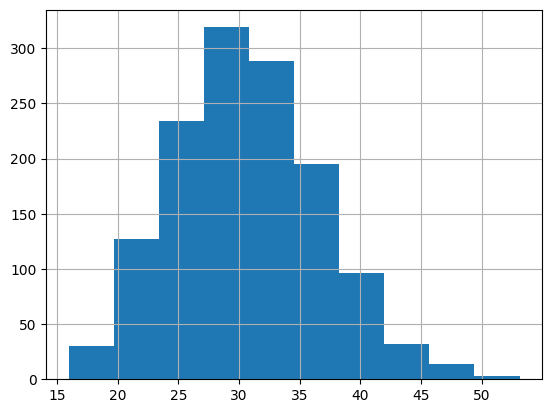

In [9]:
dataset['bmi'].hist()

## Analisando a relação de BMI entre pessoas fumantes e não fumantes

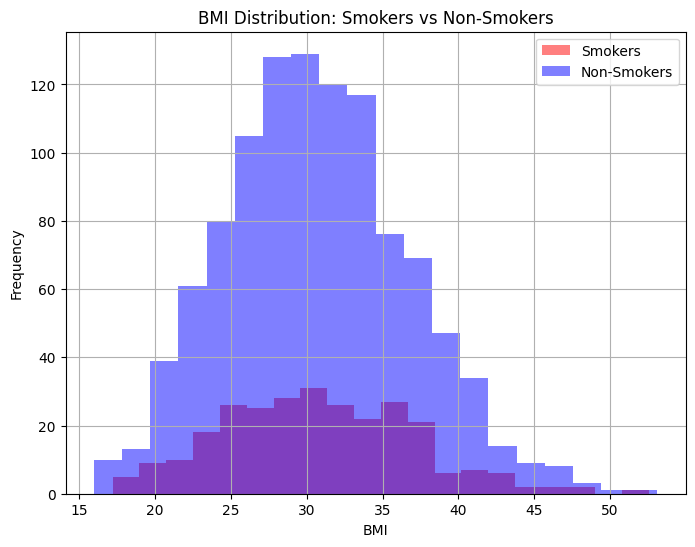

In [10]:
smokers = dataset[dataset['smoker'] == 1]
no_smokers = dataset[dataset['smoker'] == 0]

# Plotar os histogramas de BMI para fumantes e não-fumantes juntos
plt.figure(figsize=(8,6))

# Histograma para fumantes
smokers['bmi'].hist(alpha=0.5, color='red', bins=20, label='Smokers')

# Histograma para não-fumantes
no_smokers['bmi'].hist(alpha=0.5, color='blue', bins=20, label='Non-Smokers')

# Títulos e rótulos
plt.title('BMI Distribution: Smokers vs Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Mostrar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

## Analisando o Charges em relação a pessoas fumantes e não fumantes

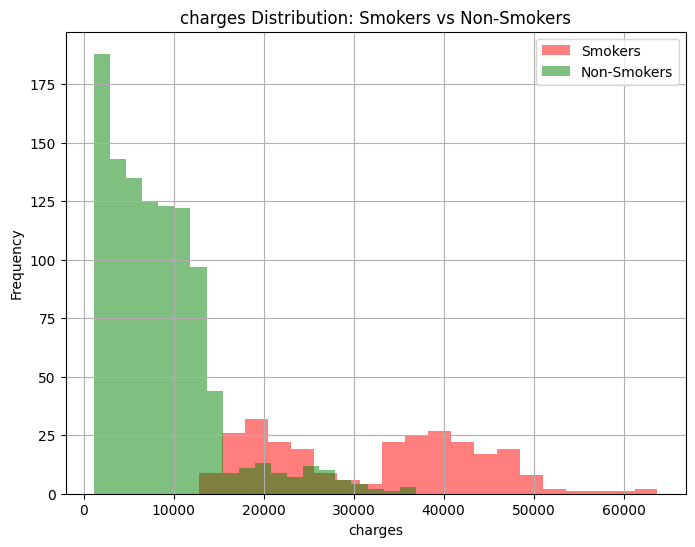

In [11]:
smokers = dataset[dataset['smoker'] == 1]
no_smokers = dataset[dataset['smoker'] == 0]

# Plotar os histogramas de BMI para fumantes e não-fumantes juntos
plt.figure(figsize=(8,6))

# Histograma para fumantes
smokers['charges'].hist(alpha=0.5, color='red', bins=20, label='Smokers')

# Histograma para não-fumantes
no_smokers['charges'].hist(alpha=0.5, color='green', bins=20, label='Non-Smokers')

# Títulos e rótulos
plt.title('charges Distribution: Smokers vs Non-Smokers')
plt.xlabel('charges')
plt.ylabel('Frequency')

# Mostrar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

### Aplicando a mesma visão em um grafico de dispersão

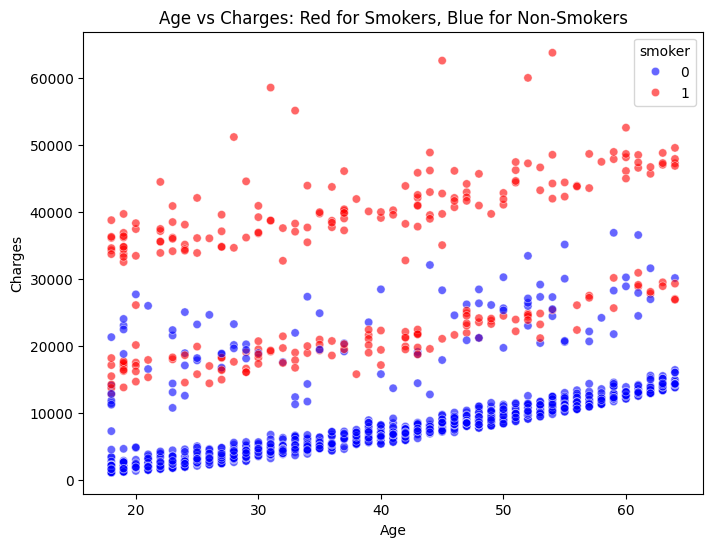

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma paleta de cores: vermelho para fumantes e azul para não-fumantes
palette = {1: 'red', 0: 'blue'}  # Assumindo que 'smoker' tem valores 'yes' e 'no'

# Gráfico de dispersão com fumantes em vermelho e não-fumantes em azul
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=dataset, palette=palette, alpha=0.6)

# Títulos e rótulos
plt.title('Age vs Charges: Red for Smokers, Blue for Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')

# Mostrar o gráfico
plt.show()


## Analisando o BMI vs Charges para fumantes e não fumantes

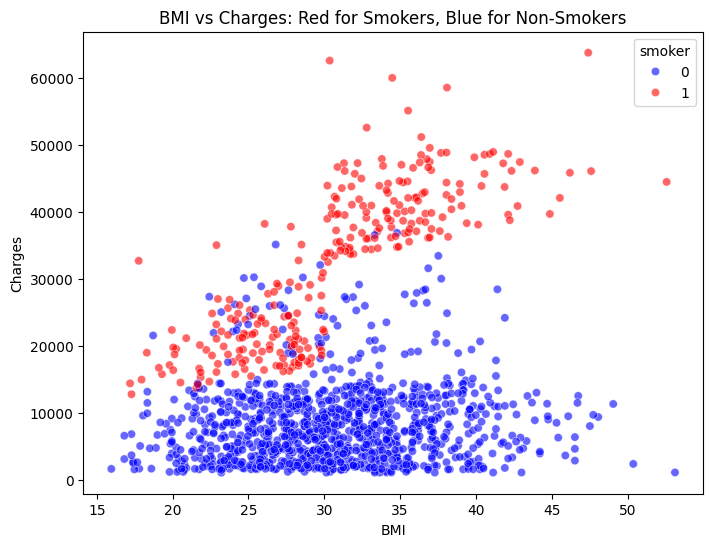

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma paleta de cores: vermelho para fumantes e azul para não-fumantes
palette = {1: 'red', 0: 'blue'}  # Assumindo que 'smoker' tem valores 'yes' e 'no'

# Gráfico de dispersão com fumantes em vermelho e não-fumantes em azul
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dataset, palette=palette, alpha=0.6)

# Títulos e rótulos
plt.title('BMI vs Charges: Red for Smokers, Blue for Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Mostrar o gráfico
plt.show()


## Verificando o balanceamento entre as colunas do dataset

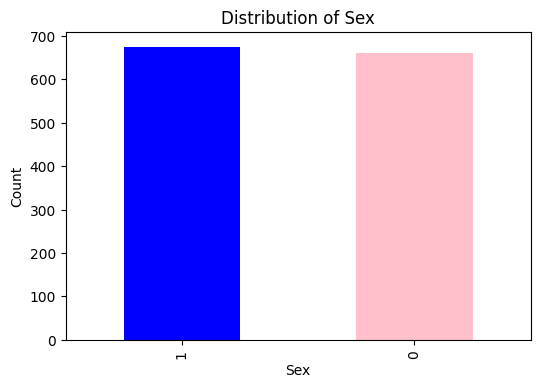

In [14]:
sex_counts = dataset['sex'].value_counts()

plt.figure(figsize=(6,4))
sex_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

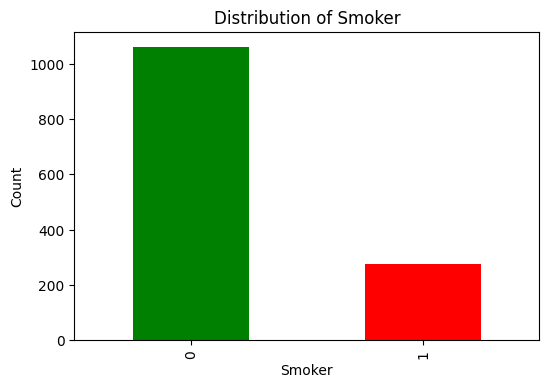

In [15]:
smoker_counts = dataset['smoker'].value_counts()

plt.figure(figsize=(6,4))
smoker_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

## Analisando a correlação dos dados do dataset

In [16]:
dataset.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


## Verificando a médias de Charges por região

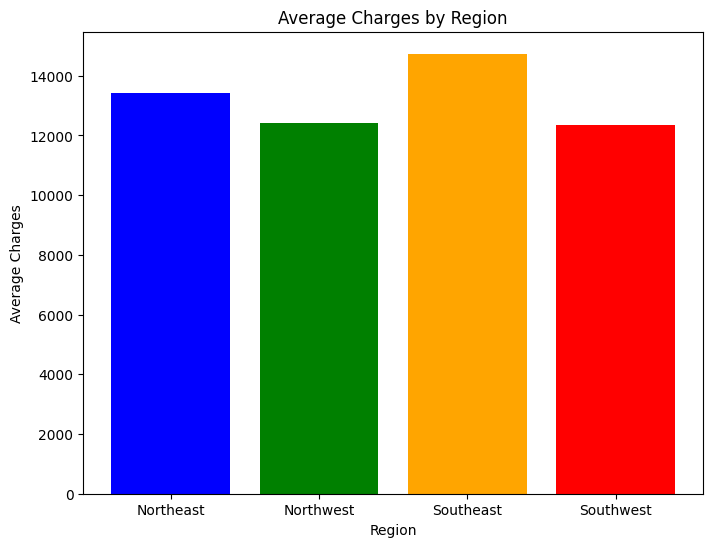

In [17]:
mean_northeast = dataset[dataset['region_northeast'] == 1]['charges'].mean()
mean_northwest = dataset[dataset['region_northwest'] == 1]['charges'].mean()
mean_southeast = dataset[dataset['region_southeast'] == 1]['charges'].mean()
mean_southwest = dataset[dataset['region_southwest'] == 1]['charges'].mean()

import matplotlib.pyplot as plt

# Médias calculadas
regions = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
mean_charges = [mean_northeast, mean_northwest, mean_southeast, mean_southwest]

# Plotar gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(regions, mean_charges, color=['blue', 'green', 'orange', 'red'])

# Títulos e rótulos
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


C:\Users\Mateus Jensen\AppData\Local\Temp\ipykernel_5264\1249026035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=datasetregion, palette='Set3')


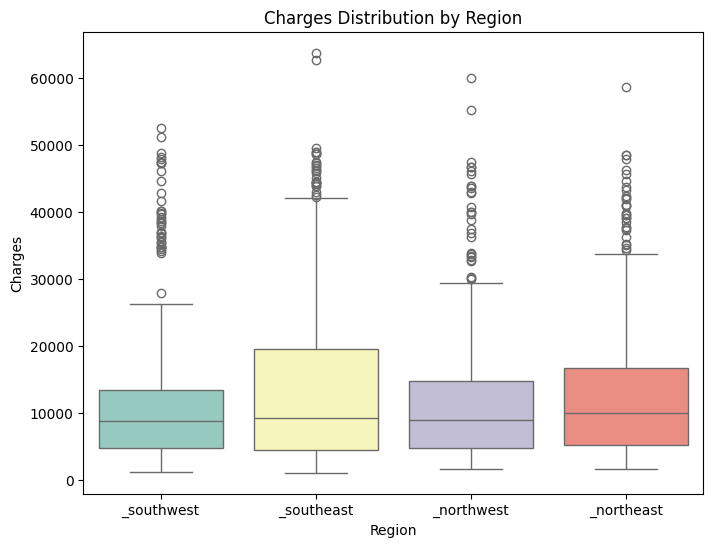

In [18]:
import seaborn as sns

# Criar uma nova coluna 'region' baseada nas colunas de one-hot encoding
datasetregion = dataset.copy()
datasetregion['region'] = datasetregion[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
datasetregion['region'] = datasetregion['region'].str.replace('region', '')

# Boxplot da distribuição de charges por região
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=datasetregion, palette='Set3')

# Títulos e rótulos
plt.title('Charges Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


C:\Users\Mateus Jensen\AppData\Local\Temp\ipykernel_5264\2107045669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_smokers['region'] = no_smokers[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
C:\Users\Mateus Jensen\AppData\Local\Temp\ipykernel_5264\2107045669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_smokers['region'] = no_smokers['region'].str.replace('region_', '')
C:\Users\Mateus Jensen\AppData\Local\Temp\ipykernel_5264\2107045669.py

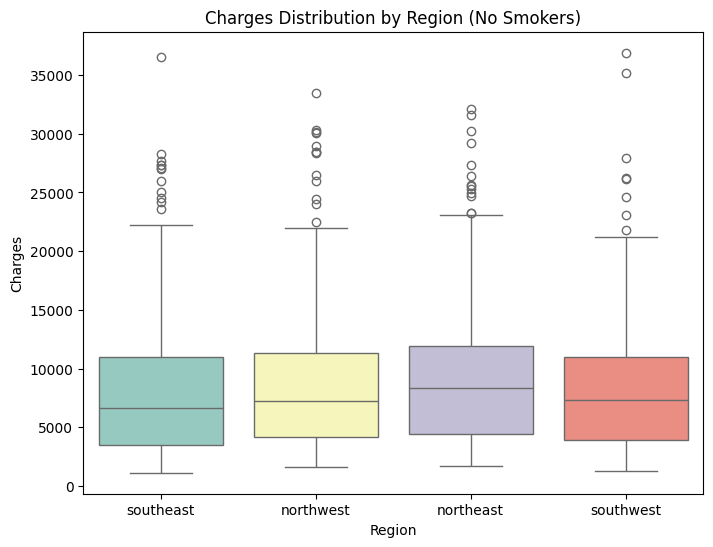

In [19]:
# Criar uma nova coluna 'region' baseada nas colunas de one-hot encoding
no_smokers['region'] = no_smokers[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)
no_smokers['region'] = no_smokers['region'].str.replace('region_', '')

# Boxplot da distribuição de charges por região
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=no_smokers, palette='Set3')

# Títulos e rótulos
plt.title('Charges Distribution by Region (No Smokers)')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


## Analisando a proporção de fumantes e não fumantes por região

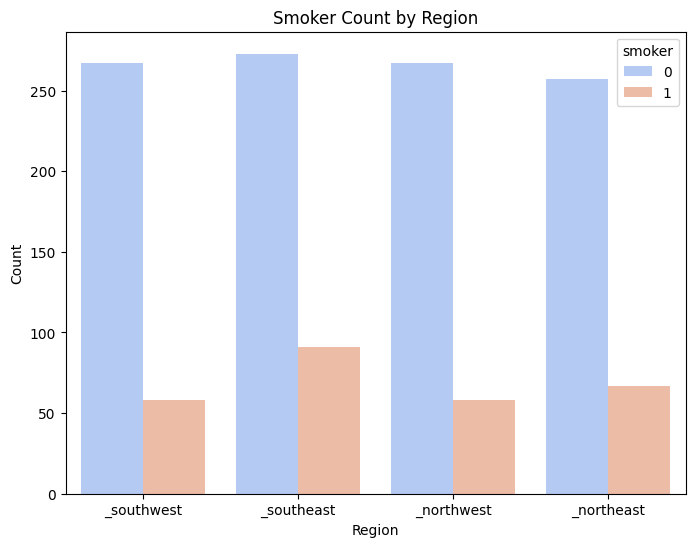

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='region', hue='smoker', data=datasetregion, palette='coolwarm')

# Títulos e rótulos
plt.title('Smoker Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


# Criando train_test_split

In [21]:
from sklearn.model_selection import train_test_split

dataset_chages = dataset[['charges']] # Variável Target
dataset_new = dataset[['age', 'sex', 'bmi', 'children', 'smoker']] # Rótulo (variável dependente)

x_train, x_test, y_train, y_test = train_test_split(dataset_new, dataset_chages, test_size=0.2, random_state=42)

# Criando modelo de regressão linear

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
lr_predictions = lr.predict(x_test)


### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo
- **Pontos Verdes (Predicted Values)**: Representam os valores previstos pelo modelo de regressão linear

O gráfico mostra que há uma dispersão considerável entre os pontos verdes e azuis, especialmente para valores mais altos do custo do plano de saúde

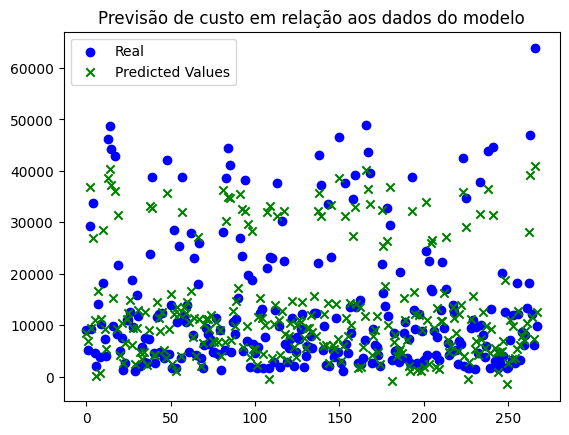

In [23]:
plt.scatter(np.arange(len(y_test)), y_test, label='Real', color='blue', marker='o')
plt.scatter(np.arange(len(lr_predictions)), lr_predictions, label='Predicted Values', color='green', marker='x')

plt.title('Previsão de custo em relação aos dados do modelo')
plt.legend()
plt.show()

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo
- **Linha Vermelha**: é a linha de regressão linear, que representa a melhor linha reta que se ajusta aos dados de acordo com o modelo de regressão linear.

O gráfico mostra que a maioria dos pontos está relativamente próxima da linha de regressão em valores mais baixos, o que é um bom sinal. No entanto, há alguns pontos que estão mais afastados, indicando erros maiores nessas previsões.

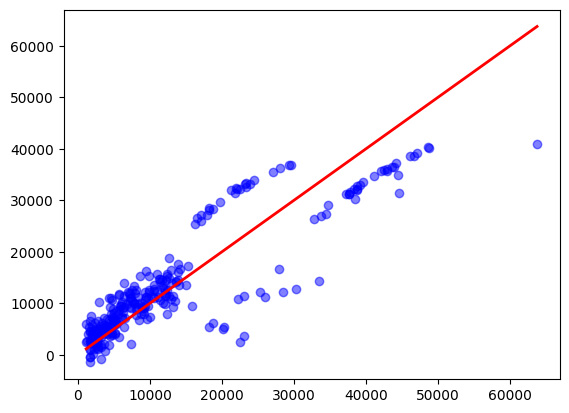

In [24]:
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5)

# Plotting the perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)


In [25]:
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = root_mean_squared_error(y_test, lr_predictions)
lr_mape = mean_absolute_percentage_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f'Erro Absoluto Médio: {lr_mae}')
print(f'Erro Médio Quadrático: {lr_mse}')
print(f'Erro Quadrático Médio da Raiz: {lr_rmse}')
print(f'Erro Percentual absoluto medio: {lr_mape}')
print(f'R² (coeficiente de determinação): {lr_r2}')

Erro Absoluto Médio: 4213.484797807138
Erro Médio Quadrático: 33979257.05080821
Erro Quadrático Médio da Raiz: 5829.17293025419
Erro Percentual absoluto medio: 0.4803556784658596
R² (coeficiente de determinação): 0.7811302113434095


#### Criando Cross Validation para o modelo - LinearRegression

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

model = LinearRegression()
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, dataset_new, dataset_chages, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [4242.58354977 4207.26355898 4023.07729524 4293.64920693 4216.25096839]
Média do MAE: 4196.564915862608
Desvio Padrão do MAE: 91.80744019585144


### Conclusão - LinearRegression

#### MAE(Erro Absoluto Quadratico):
- O valor ficou em **4213.48** indicando uma quando distãncia dos valores reais
#### MSE(Erro médio Quadrático):
- O valor ficou em **33979257** considerado um valor muito alto indicando grande erros nas previsões.

#### R²(Coeficinte de determinação):
- O modelo apresentou **78.11%** de variãncia nos daos de saída, sendo um valor mediano

# Criando modelo de RandomForestRegressor 

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6, n_jobs=2)
rf_model.fit(x_train, y_train.values.ravel())

rf_predict = rf_model.predict(x_test)

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo.
- **Linha Vermelha**: é a linha de regressão ideal, onde os valores previstos seriam exatamente iguais aos valores reais.

O gráfico mostra que a maioria dos pontos está relativamente próxima da linha de regressão ideal, o que é um bom sinal. Isso indica que o modelo de **RandomForestRegressor** está fazendo previsões bastante precisas.

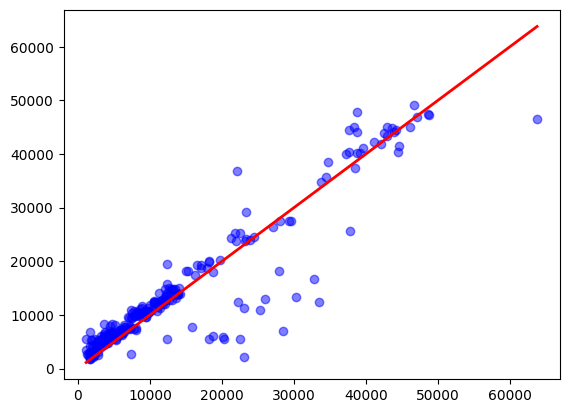

In [27]:
plt.scatter(y_test, rf_predict, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

### Analise do resíduos, que são a diferença entre os valores reais e os valores previstos

- **Pontos Azuis**: Cada ponto azul no gráfico representa um resíduo para uma amostra específica.
- **Linha Vermelha Pontilhada**: Representa a linha de zero resíduo. Idealmente, os resíduos devem estar distribuídos uniformemente ao redor desta linha.

A maioria dos resíduos está concentrada em torno da linha de zero, o que é um bom sinal. No entanto, há alguns resíduos grandes, especialmente para valores previstos mais altos.

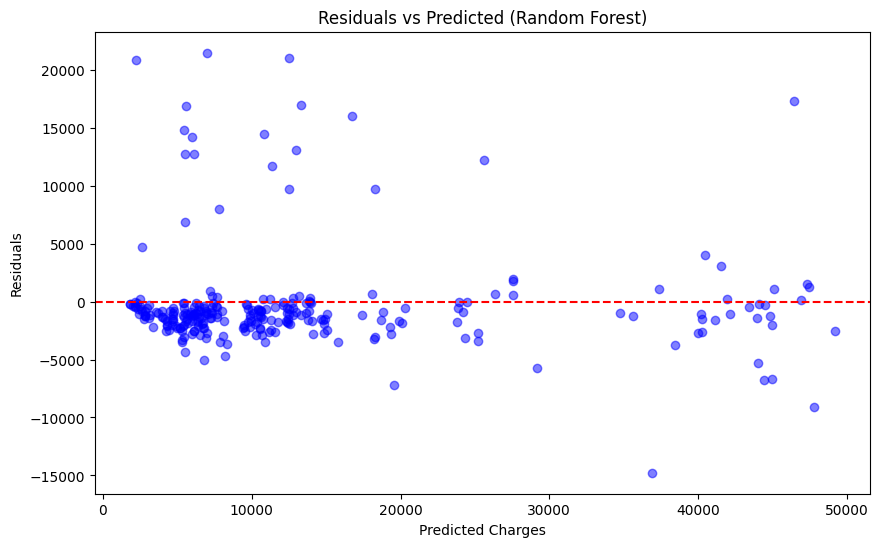

In [28]:
y_test_array = y_test.values.ravel() 

residuals_rf = y_test_array - rf_predict

# Plot residuals for Random Forest
plt.figure(figsize=(10,6))
plt.scatter(rf_predict, residuals_rf, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Random Forest)')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

In [29]:
rf_mae = mean_absolute_error(y_test, rf_predict)
rf_mse = mean_squared_error(y_test, rf_predict)
rf_rmse = root_mean_squared_error(y_test, rf_predict)
rf_mape = mean_absolute_percentage_error(y_test, rf_predict)
rf_r2 = r2_score(y_test, rf_predict)

print(f'Erro Absoluto Medio: {rf_mae}')
print(f'Erro Quadratico Medio: {rf_mse}')
print(f'Erro Quadrático Médio da Raiz: {rf_rmse}')
print(f'Erro Percentual absoluto medio: {rf_mape}')
print(f'R² (coeficiente de determinação): {rf_r2}')

Erro Absoluto Medio: 2523.2484279502596
Erro Quadratico Medio: 20237960.551693387
Erro Quadrático Médio da Raiz: 4498.6620846306505
Erro Percentual absoluto medio: 0.3188787627161502
R² (coeficiente de determinação): 0.8696417010481933


#### Criando Cross Validation para o modelo - RandomForestRegressor

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

model = RandomForestRegressor()
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, dataset_new, dataset_chages, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [2737.70830588 2978.24859741 2574.48589529 2638.42695063 2846.58409223]
Média do MAE: 2755.090768288005
Desvio Padrão do MAE: 144.70740238464083


### Conclusão - RandomForestRegressor

#### MAE(Erro Absoluto Quadratico):
- O valor utilizando **RandomForestRegressor** ficou em **2523.24** sendo significativamente menor que o modelo de regressão linear a cima.
- Dado a comparação entedemos que o modelo de **RandomForestRegressor** comente menos erros em termos absolutos

#### MSE(Erro médio Quadrático):
- O valor utilizando **RandomForestRegressor** ficou em **20237960**, sendo também menor em relação ao modelo de regressão linear.
- Como o MSE penaliza mais os grandes erros (devido ao quadrado dos erros), um valor menor indica que o **RandomForestRegressor** é mais robusto contra grandes desvios.

#### R²(Coeficinte de determinação):
- O valor utilizando **RandomForestRegressor** ficou em **86.96%**, Um R² mais alto indica um melhor ajuste do modelo aos dados.

# Criando modelo de DecisionTreeRegressor 

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3, random_state=42)

dt.fit(x_train, y_train)
dt_predictions = dt.predict(x_test)

### Analise do grafico de dispersão

- **Pontos Azuis (Real)**: Representam os valores reais do modelo.
- **Linha Vermelha**: é a linha de regressão ideal, onde os valores previstos seriam exatamente iguais aos valores reais.

O gráfico mostra que a maioria dos pontos está relativamente próxima da linha de regressão ideal, o que é um bom sinal. No entanto o modelo de **DecisionTreeRegressor** há uma dispersão considerável dos pontos, especialmente para valores mais altos.

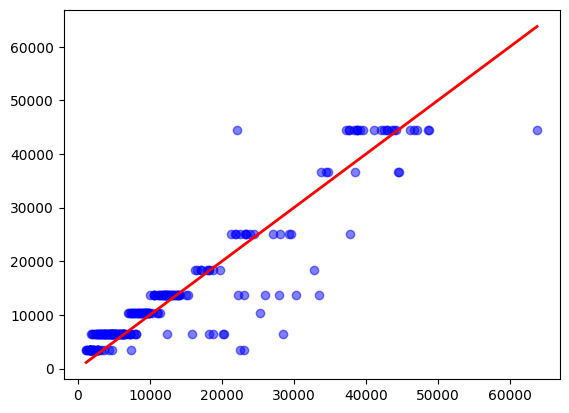

In [31]:
plt.scatter(y_test, dt_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [32]:
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = root_mean_squared_error(y_test, dt_predictions)
dt_mape = mean_absolute_percentage_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Erro Absoluto Medio: {dt_mae}')
print(f'Erro Quadratico Medio: {dt_mse}')
print(f'Erro Quadrático Médio da Raiz: {dt_rmse}')
print(f'Erro Percentual absoluto medio: {dt_mape}')
print(f'R² (coeficiente de determinação): {dt_r2}')

Erro Absoluto Medio: 2865.6378101751257
Erro Quadratico Medio: 22812669.852340844
Erro Quadrático Médio da Raiz: 4776.261074558304
Erro Percentual absoluto medio: 0.37679713319967345
R² (coeficiente de determinação): 0.8530572866320028


#### Criando Cross Validation para o modelo - DecisionTreeRegressor

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

model = DecisionTreeRegressor()
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, dataset_new, dataset_chages, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [3154.19707078 3249.6808938  2939.3340136  3110.04334646 3715.77234215]
Média do MAE: 3233.8055333601596
Desvio Padrão do MAE: 261.1176340337919


### Conclusão - DecisionTreeRegressor

#### MAE(Erro Absoluto Quadratico):
- O valor utilizando **DecisionTreeRegressor** ficou em **2865.63**, sendo menor do que o da **regressão linear**, mas maior do que o do **RandomForestRegressor**. 
- Isso indica que, em média, as previsões do **DecisionTreeRegressor** estão mais próximas dos valores reais do que as previsões do modelo de **regressão linear**, mas não tão próximas quanto as do **RandomForestRegressor**

#### MSE(Erro médio Quadrático):
- O valor utilizando **DecisionTreeRegressor** ficou em **22812669**, sendo menor do que o da **regressão linear**, mas maior do que o do **RandomForestRegressor**. 
- Isso sugere que o **DecisionTreeRegressor** tem menos erros grandes em comparação com o modelo de **regressão linear**, mas mais do que o **RandomForestRegressor**. 
- Como o MSE penaliza mais os grandes erros, um valor menor indica um modelo mais robusto contra grandes desvios.

#### R²(Coeficinte de determinação):
- O valor utilizando **DecisionTreeRegressor** ficou em **85.30%**, O R² do **DecisionTreeRegressor** é maior do que o do modelo de **regressão linear**, mas menor do que o do **RandomForestRegressor**.
- Sugerindo que o **DecisionTreeRegressor** explica uma maior proporção da variância dos dados (aproximadamente 85.30%) em comparação com o modelo de **regressão linear** (aproximadamente 78.11%), mas não tanto quanto o **RandomForestRegressor** (aproximadamente 86.96%).

# Criando modelo de GradientBoostingRegressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)

reg_predictions = reg.predict(x_test)

reg.score(x_test, y_test)

c:\Users\Mateus Jensen\Documents\GitHub\postech-iadev\.venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.8785117259694142

In [34]:
reg_mae = mean_absolute_error(y_test, reg_predictions)
reg_mse = mean_squared_error(y_test, reg_predictions)
reg_rmse = root_mean_squared_error(y_test, reg_predictions)
reg_mape = mean_absolute_percentage_error(y_test, reg_predictions)
reg_r2 = r2_score(y_test, reg_predictions)

print(f'Erro Absoluto Medio: {reg_mae}')
print(f'Erro Quadratico Medio: {reg_mse}')
print(f'Erro Quadrático Médio da Raiz: {reg_rmse}')
print(f'Erro Percentual absoluto medio: {reg_mape}')
print(f'R² (coeficiente de determinação): {reg_r2}')

Erro Absoluto Medio: 2424.531783050589
Erro Quadratico Medio: 18860900.434373412
Erro Quadrático Médio da Raiz: 4342.913818437272
Erro Percentual absoluto medio: 0.301365522954552
R² (coeficiente de determinação): 0.8785117259694142


#### Criando Cross Validation para o modelo - GradientBoostingRegressor

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

model = GradientBoostingRegressor()
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, dataset_new, dataset_chages, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [2529.18087035 2751.53262899 2215.85870226 2516.74279771 2490.32003926]
Média do MAE: 2500.7270077139997
Desvio Padrão do MAE: 170.42760570758435


# Criando modelo de Light Gradient Boosting Machine

In [35]:
import lightgbm as lgb

lghtgbm = lgb.LGBMRegressor(force_row_wise=True, verbose=-1)
lghtgbm.fit(x_train, y_train)

lghtgbm_predictions = lghtgbm.predict(x_test)

lghtgbm.score(x_test, y_test)

0.8676203642015372

In [36]:
lghtgbm_mae = mean_absolute_error(y_test, lghtgbm_predictions)
lghtgbm_mse = mean_squared_error(y_test, lghtgbm_predictions)
lghtgbm_rmse = root_mean_squared_error(y_test, lghtgbm_predictions)
lghtgbm_mape = mean_absolute_percentage_error(y_test, lghtgbm_predictions)
lghtgbm_r2 = r2_score(y_test, lghtgbm_predictions)

print(f'Erro Absoluto Medio: {lghtgbm_mae}')
print(f'Erro Quadratico Medio: {lghtgbm_mse}')
print(f'Erro Quadrático Médio da Raiz: {lghtgbm_rmse}')
print(f'Erro Percentual absoluto medio: {lghtgbm_mape}')
print(f'R² (coeficiente de determinação): {lghtgbm_r2}')

Erro Absoluto Medio: 2559.4310541667282
Erro Quadratico Medio: 20551770.533054322
Erro Quadrático Médio da Raiz: 4533.4060631113025
Erro Percentual absoluto medio: 0.3426835782581633
R² (coeficiente de determinação): 0.8676203642015372


In [37]:
model = lgb.LGBMRegressor(force_row_wise=True, verbose=-1)
mae_scorer = make_scorer(mean_absolute_error)
cv_scores = cross_val_score(model, x_test, lghtgbm_predictions, cv=5, scoring=mae_scorer)

# Resultados
print(f'Cross-Validation MAE Scores: {cv_scores}')
print(f'Média do MAE: {cv_scores.mean()}')
print(f'Desvio Padrão do MAE: {cv_scores.std()}')

Cross-Validation MAE Scores: [1497.68871397 1441.79557996 1728.97945003 2337.76870498 1251.65876953]
Média do MAE: 1651.578243692774
Desvio Padrão do MAE: 375.35973015038263


# Conclusão

In [38]:
data = {
    'Model': ['LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor', 'GradientBoostingRegressor', 'Light Gradient Boosting Machine	'],
    'MAE': [lr_mae, rf_mae, dt_mae, reg_mae, lghtgbm_mae],
    'MSE': [lr_mse, rf_mse, dt_mse, reg_mse, lghtgbm_mse],
    'RMSE': [lr_rmse, rf_rmse, dt_rmse, reg_rmse, lghtgbm_rmse],
    'MAPE': [lr_mape, rf_mape, dt_mape, reg_mape, lghtgbm_mape],
    'R2': [lr_r2, rf_r2, dt_r2, reg_r2, lghtgbm_r2],
}

df = pd.DataFrame(data)
df

,Model,MAE,MSE,RMSE,MAPE,R2
0,LinearRegression,4213.484798,3.397926e+07,5829.172930,0.480356,0.781130
1,RandomForestRegressor,2523.248428,2.023796e+07,4498.662085,0.318879,0.869642
2,DecisionTreeRegressor,2865.637810,2.281267e+07,4776.261075,0.376797,0.853057
3,GradientBoostingRegressor,2424.531783,1.886090e+07,4342.913818,0.301366,0.878512
4,Light Gradient Boosting Machine\t,2559.431054,2.055177e+07,4533.406063,0.342684,0.867620


### Conclusão: O modelo GradientBoostingRegressor foi o melhor entre os avaliados.

O GradientBoostingRegressor apresentou os melhores resultados nas seguintes métricas:
- **MAE (Mean Absolute Error):** 2424.53, o menor valor entre os modelos, indicando previsões mais próximas dos valores reais.
  
- **MSE (Mean Squared Error):** 1.886e+07, o menor valor, penalizando menos os erros maiores.

  
- **RMSE (Root Mean Squared Error):** 4342.91, o menor valor, reforçando o desempenho superior em termos de erro quadrático médio.

  
- **MAPE (Mean Absolute Percentage Error):** 0.301, o menor valor, indicando um percentual de erro absoluto menor.

  
- **R² (Coeficiente de Determinação):** 0.8785, um dos mais altos, explicando uma maior proporção da variabilidade dos dados.

Portanto, o GradientBoostingRegressor se destaca como o melhor modelo devido ao seu desempenho superior em todas as métricas avaliadas.

# Rodando o Pycaret

In [39]:
df = dataset.copy()

from pycaret.regression import *
s = setup(dataset, target = 'charges', session_id = 42, n_jobs=2, train_size=0.8, fold=30)

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 10)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [40]:
comparation = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2589.4951,21453238.4729,4506.3551,0.8379,0.4253,0.3006,0.0597
rf,Random Forest Regressor,2733.5911,23611565.0239,4765.7607,0.8238,0.4531,0.3260,0.1377
lightgbm,Light Gradient Boosting Machine,2889.3464,23929106.3824,4771.3237,0.8206,0.5381,0.3523,0.0250
ada,AdaBoost Regressor,3880.0838,25427789.5746,4972.4497,0.8073,0.5642,0.6053,0.0153
et,Extra Trees Regressor,2695.6597,26425648.7940,5061.7035,0.8032,0.4645,0.3088,0.1120
ridge,Ridge Regression,4255.0538,37936064.2667,6069.5383,0.7148,0.5696,0.4261,0.0070
br,Bayesian Ridge,4250.5408,37936070.6667,6069.3044,0.7147,0.5699,0.4252,0.0110
lar,Least Angle Regression,4245.1841,37935806.0667,6069.0013,0.7146,0.5721,0.4242,0.0073
llar,Lasso Least Angle Regression,4245.1263,37932346.6667,6068.7393,0.7146,0.5705,0.4243,0.0090
lasso,Lasso Regression,4245.1292,37932353.4000,6068.7400,0.7146,0.5705,0.4243,0.0077


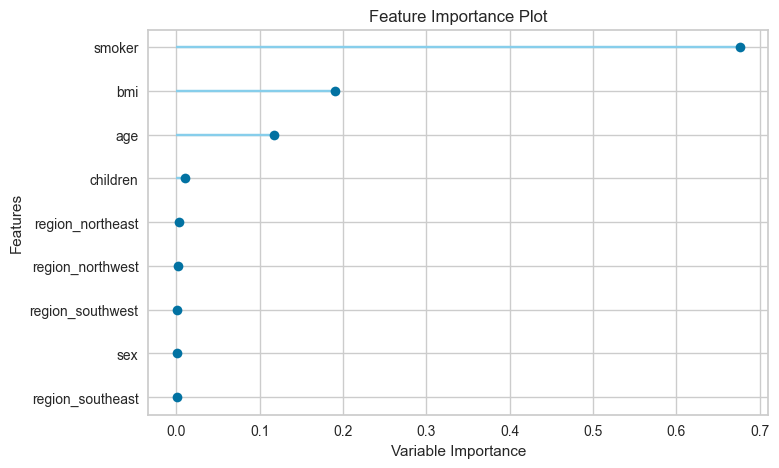

In [41]:
s.plot_model(comparation, plot = 'feature')

In [42]:
evaluate_model(comparation)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

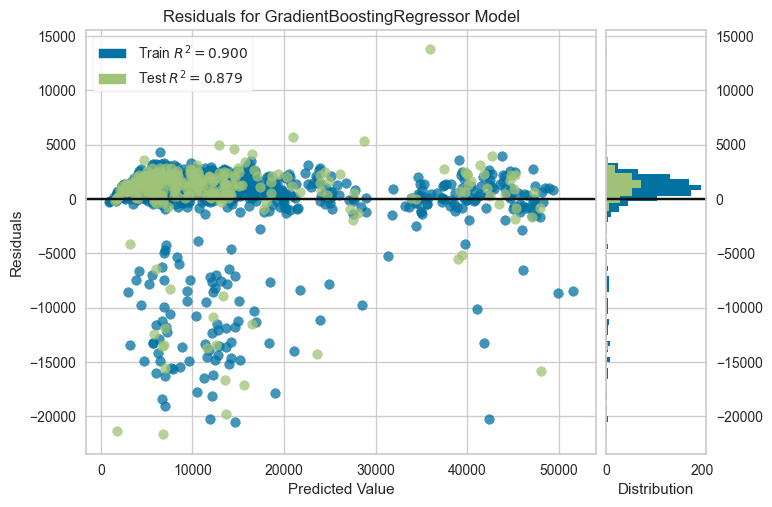

In [43]:
s.plot_model(comparation, plot = 'residuals')